In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

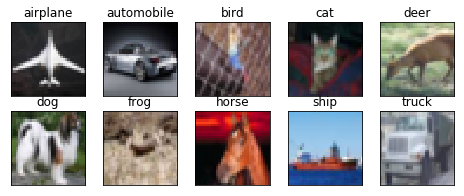

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/gdrive')

# checkpoint
model_path="/content/gdrive/My Drive/Colab Notebooks/Assignment7"
model_file = model_path + '/model_7.hd5'
checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Assignment 7 : Efficient Neural Architecture Search (ENAS)

In [0]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.layers import Input, Convolution2D, BatchNormalization, Dropout, SeparableConv2D, concatenate, MaxPooling2D, Flatten, Activation, Lambda
from keras.models import Model

import tensorflow as tf


def spacetodepth_2(x, block_size=2):
    return tf.space_to_depth(x, block_size= block_size)



inputs = Input(shape=(32, 32, 3))



                               ###### BLOCK-1  BEGINS ######
layer_b1_1 = SeparableConv2D(8, 5, 5, activation='relu', border_mode='same')(inputs) # Jin=1 ; output= 32; RF= 5 * 5

layer_b1_1 = BatchNormalization()(layer_b1_1)
layer_b1_1 = Dropout(0.2)(layer_b1_1)


l_b1_1_as_16 = Lambda(spacetodepth_2)(layer_b1_1)
print('>>>>>', l_b1_1_as_16.shape)
l_b1_1_as_8 = Lambda(spacetodepth_2)(l_b1_1_as_16)
print('>>>>>', l_b1_1_as_8.shape)


layer_b1_2 = Convolution2D(16, 5, 5, activation='relu', border_mode='same') (layer_b1_1) # Jin=1 ; output= 32; RF= 9 * 9
layer_b1_2 = BatchNormalization()(layer_b1_2)
layer_b1_2 = Dropout(0.25)(layer_b1_2)


l_b1_2_as_16 = Lambda(spacetodepth_2)(layer_b1_2)
l_b1_2_as_8 = Lambda(spacetodepth_2)(l_b1_2_as_16)



layer_b1_3 = Convolution2D(32, 5, 5, activation='relu', border_mode='same') (layer_b1_2) # Jin=1 ; output= 32; RF= 13 * 13
layer_b1_3 = BatchNormalization()(layer_b1_3)
layer_b1_3 = Dropout(0.25)(layer_b1_3)


l_b1_3_as_16 = Lambda(spacetodepth_2)(layer_b1_3)
l_b1_3_as_8 = Lambda(spacetodepth_2)(l_b1_3_as_16)


### CONCATENATION ####
concat_b1_1_b1_3 = concatenate([layer_b1_1, layer_b1_3]) 

layer_b1_4 = SeparableConv2D(64, 5, 5, activation='relu', border_mode='same')(concat_b1_1_b1_3) # Jin=1 ; output= 32; RF= 17 * 17
layer_b1_4 = BatchNormalization()(layer_b1_4)
layer_b1_4 = Dropout(0.25)(layer_b1_4)


l_b1_4_as_16 = Lambda(spacetodepth_2)(layer_b1_4)
l_b1_4_as_8 = Lambda(spacetodepth_2)(l_b1_4_as_16)

### CONCATENATION ####
concat_b1_1_b1_4 = concatenate([layer_b1_1, layer_b1_4]) 

max_pool_b1_1 = MaxPooling2D(pool_size=(2, 2)) (concat_b1_1_b1_4) # Jin=1 ; output= 16 ; RF= 18 * 18
                ###### BLOCK-1  END ######



                    ###### BLOCK-2 ######
layer_b2_1 = SeparableConv2D(8, 3, 3, activation='relu', border_mode='same')(max_pool_b1_1) # Jin=2 ; output= 16 ; RF= 22 * 22
layer_b2_1 = BatchNormalization()(layer_b2_1)
layer_b2_1 = Dropout(0.25)(layer_b2_1)

l_b2_1_as_8 = Lambda(spacetodepth_2)(layer_b2_1)


### CONCATENATION ####
concat_b1_1_b2_1 = concatenate([l_b1_1_as_16, layer_b2_1]) 
concat_b1_4_b2_1 = concatenate([l_b1_4_as_16, layer_b2_1]) 
master_concat_5 = concatenate([concat_b1_1_b2_1, concat_b1_4_b2_1])

layer_b2_2 = Convolution2D(16, 5, 5, activation='relu', border_mode='same') (master_concat_5) # Jin=2 ; output= 16; RF= 30 * 30
layer_b2_2 = BatchNormalization()(layer_b2_2)
layer_b2_2 = Dropout(0.25)(layer_b2_2)

### CONCATENATION ####
concat_b2_1_b2_2 = concatenate([layer_b2_1, layer_b2_2])
concat_b1_3_b2_2 = concatenate([l_b1_3_as_16, layer_b2_2])
concat_b1_4_b2_2 = concatenate([l_b1_4_as_16, layer_b2_2])
master_concat_1 = concatenate([concat_b1_3_b2_2, concat_b1_4_b2_2, concat_b2_1_b2_2])

layer_b2_3 = SeparableConv2D(32, 3, 3, activation='relu', border_mode='same')(master_concat_1) # Jin=2 ; output= 16; RF= 34 * 34
layer_b2_3 = BatchNormalization()(layer_b2_3)
layer_b2_3 = Dropout(0.25)(layer_b2_3)

### CONCATENATION ####
concat_b2_1_b2_3 = concatenate([layer_b2_1, layer_b2_3])
concat_b1_3_b2_3 = concatenate([l_b1_3_as_16, layer_b2_3])
concat_b1_1_b2_3 = concatenate([l_b1_1_as_16, concat_b1_3_b2_3]) 
master_concat_2 = concatenate([concat_b1_1_b2_3, concat_b1_3_b2_3, concat_b2_1_b2_3])


layer_b2_4 = SeparableConv2D(64, 5, 5, activation='relu', border_mode='same')(master_concat_2) # Jin=2 ; output= 16; RF= 42 * 42
layer_b2_4 = BatchNormalization()(layer_b2_4)
layer_b2_4 = Dropout(0.25)(layer_b2_4)

### CONCATENATION ####
concat_b1_4_b2_4 = concatenate([l_b1_4_as_16, layer_b2_4])
concat_b2_1_b2_4 = concatenate([layer_b2_1, layer_b2_4])
master_concat_6 = concatenate([concat_b1_4_b2_4, concat_b2_1_b2_4])

max_pool_b2_1 = MaxPooling2D(pool_size=(2, 2)) (master_concat_6) # Jin=2 ; output= 8; RF= 44 * 44
                ###### BLOCK-2  ENDS ######
    
    

                        ###### BLOCK-3  BEGINS ######
layer_b3_1 = Convolution2D(8, 5, 5,  border_mode='same') (max_pool_b2_1) # Jin=4 ; output= 8; RF= 60 * 60
layer_b3_1 = BatchNormalization()(layer_b3_1)
layer_b3_1 = Dropout(0.25)(layer_b3_1)


### CONCATENATION ####
concat_b1_1_b3_1 = concatenate([l_b1_1_as_8, layer_b3_1]) 
concat_b1_2_b3_1 = concatenate([l_b1_2_as_8, layer_b3_1]) 
concat_b1_3_b3_1 = concatenate([l_b1_3_as_8, layer_b3_1]) 
concat_b1_4_b3_1 = concatenate([l_b1_4_as_8, layer_b3_1]) 
master_concat_4 = concatenate([concat_b1_1_b3_1, concat_b1_2_b3_1, concat_b1_3_b3_1, concat_b1_4_b3_1]) 


layer_b3_2 = SeparableConv2D(16, 5, 5, border_mode='same')(master_concat_4) # Jin=4 ; output= 8; RF= 76 * 76
layer_b3_2 = BatchNormalization()(layer_b3_2)
layer_b3_2 = Dropout(0.25)(layer_b3_2)

### CONCATENATION ####
concat_b1_2_b3_2 = concatenate([l_b1_2_as_8, layer_b3_2])

layer_b3_3 = Convolution2D(32, 3, 3, border_mode='same') (concat_b1_2_b3_2) # Jin=4 ; output= 8; RF= 84 * 84
layer_b3_3= BatchNormalization()(layer_b3_3)
layer_b3_3 = Dropout(0.25)(layer_b3_3)

### CONCATENATION ####
concat_b2_1_b3_3 = concatenate([l_b2_1_as_8, layer_b3_3])
concat_b1_1_b3_3 = concatenate([l_b1_1_as_8, layer_b3_3]) 
concat_b1_4_b3_3 = concatenate([l_b1_4_as_8,layer_b3_3])
master_concat_3 = concatenate([concat_b1_1_b3_3, concat_b1_4_b3_3, concat_b2_1_b3_3])

layer_b3_4 = SeparableConv2D(64, 5, 5, border_mode='same')(master_concat_3) # Jin=4 ; output= 8; RF= 100 * 100
concat_b1_4_b3_4 = concatenate([l_b1_4_as_8,layer_b3_4])
        ###### BLOCK-3  ENDS ######

final_layer = Convolution2D(10, 8, 8) (concat_b1_4_b3_4) # Jin=4 ; output= 1; RF= 128 * 128
outputs = Flatten()(final_layer)
outputs= Activation('softmax')(outputs)
model = Model(inputs=[inputs], outputs=[outputs])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(8, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", padding="same")`


>>>>> (?, 16, 16, 32)
>>>>> (?, 8, 8, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(8, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykerne

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_113 (Separable (None, 32, 32, 8)    107         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 32, 32, 8)    32          separable_conv2d_113[0][0]       
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 32, 32, 8)    0           batch_normalization_75[0][0]     
__________________________________________________________________________________________________
conv2d_97 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=100)`
  del sys.path[0]


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


195/195 [==============================] - 91s 468ms/step - loss: 3.0718 - acc: 0.3539 - val_loss: 4.3847 - val_acc: 0.1969
Epoch 2/100
195/195 [==============================] - 81s 413ms/step - loss: 1.5437 - acc: 0.4693 - val_loss: 2.1753 - val_acc: 0.3463
Epoch 3/100
195/195 [==============================] - 81s 413ms/step - loss: 1.2500 - acc: 0.5576 - val_loss: 1.4403 - val_acc: 0.5102
Epoch 4/100
195/195 [==============================] - 81s 413ms/step - loss: 1.1110 - acc: 0.6071 - val_loss: 1.2611 - val_acc: 0.5598
Epoch 5/100
195/195 [==============================] - 81s 414ms/step - loss: 1.0064 - acc: 0.6457 - val_loss: 1.3508 - val_acc: 0.5551
Epoch 6/100
195/195 [==============================] - 81s 415ms/step - loss: 0.9257 - acc: 0.6745 - val_loss: 1.1967 - val_acc: 0.6040
Epoch 7/100
195/195 [==============================] - 81s 415ms/step - loss: 0.8565 - acc: 0.6991 - val_loss: 1.1084 - val_acc: 0.6272
Epoch 8/100
195/195 [==============================] - 81s 4

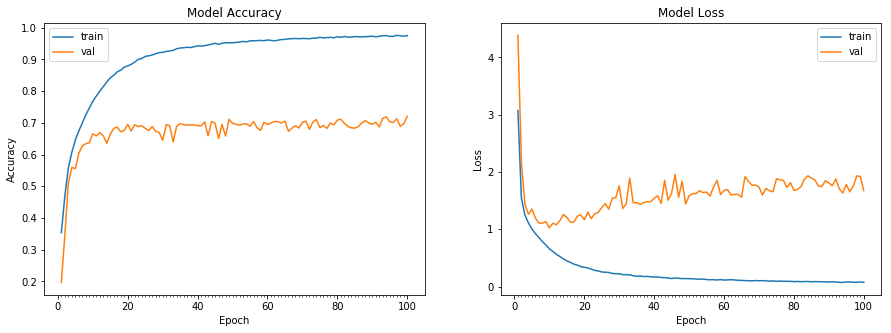

Accuracy on test data is: 72.05


In [34]:
from keras.preprocessing.image import ImageDataGenerator
import time

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))